<a href="https://colab.research.google.com/github/isharaju/NLP_author_identification/blob/main/author_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Things to do:
1. Replace new lines with space 
2. What to do with words like Gemme?
3. Unknown [possible:words treatment?]
4. Change matric accuracy with F1 Prec-Recall and perplexity
5. Handling sentences with --: you are come at last--how I have longed for you!  Sit by me--do not leave me--never leave me again, Sandy, never again. Where is your hand --give it me, dear
6. Program to delete any author name left in the corpus
7. Getting rid of numbers and square brackets: eg. ACD-> Study in scarlet: “looking for lodgings.” [3] i answered.
8. Delete Gutenberg lines from ACD and MT
9. Checking for overfitting by comparing training and test loss

# Code to be added

df.sample(n=3, random_state=1)


In [223]:
# loading the libraries
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import collections 

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from io import BytesIO
import requests, base64
import codecs

import os

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from datetime import datetime

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
# mounting the directory
from google.colab import drive
# commented as it is mounted now
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
def read_file(path):
  with open(path, "r") as input:
      document_collection = input.read().split("\n\n")
  return document_collection

def split(doc):
    pattern = r'[A-Za-z0-9]+'
    stop_words = set(stopwords.words('english'))
    tokens = nltk.regexp_tokenize(doc, pattern)
    filtered_sentence = [w for w in tokens if not w in stop_words]   
    return filtered_sentence

def doc_vocab(filestream):
    file = filestream
    
    collection = []
    lexicon_count = {}
    index = -1

    for doc in file:
        doc=doc.lower().rstrip()
        collection.append(doc)
        tokens = split(doc)
        
        for word in tokens:
            if lexicon_count.get(word, -1) ==-1:
                lexicon_count[word] =1
            else:
                lexicon_count[word] +=1
                
    return lexicon_count, collection



# creating a parent function
def book_to_corpus(path, author, author_num, genre):
  # reading the file and storing into collection
  document_collection = read_file(path)

  # creating a document vocab
  vocab, coll = doc_vocab(document_collection)
  vocab = {k: v for k, v in sorted(vocab.items(), key=lambda item: item[1], reverse=True)}
  
  # filtering coll
  result = []
  for c in coll:
    if len(c) > 30:
      result.append(c)

  # creting a dataframe
  words = list(vocab.keys())
  freqs = list(vocab.values())
  
  # using the 2 lists we can create a df
  # this one is used to create word cloud and only vocab is used and
  # not the whole collection
  df_cloud = pd.DataFrame(
    {
        'Author': author,
     'Author Number': author_num,
     'Genre': genre,
        'word': words,
     'frequency': freqs
    })
  
  # now we are creating a seperate one
  # to create a df for storing collection
  df = pd.DataFrame(
    {
        'Author': author,
     'Author Number': author_num,
     'Genre': genre,
        'Sentence': result
    })
  

  #visualize_word_freq(document_collection, vocab, author_num)
  print(df.head())
  return df


# helper function to encode png to base64 
# to use it for word cloud with
# custom shape
def encode_image(image_url):
    buffered = BytesIO(requests.get(image_url).content)
    image_base64 = base64.b64encode(buffered.getvalue())
    return image_base64


def visualize_word_freq(document_collection, vocab, author_index):
  lexicon_count, collection = doc_vocab(document_collection)
  top = collections.Counter(lexicon_count).most_common()
  x_list = []
  y_list = []
  for i in range(len(top)):
      x_list.append(top[i][0])
      y_list.append(top[i][1])
  d = {"word": x_list, "frequency":y_list}
  d1 = pd.DataFrame(d)
  print(d1.head())

  # bar plot to show most frequent words from the corpus
  plt.figure(figsize=(15,10))
  sns.set_theme(style="whitegrid")
  ax = sns.barplot(x="word", y="frequency", data=d1[:20],palette="Blues_d")
  ax.set_xticklabels(ax.get_xticklabels(), rotation=270, ha="right")


  # builiding the word cloud from the vocab
  plt.figure(figsize=(10,5))
  wordcloud = WordCloud()
  wordcloud.generate_from_frequencies(frequencies=vocab)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()


  # # based on author we will change our cloud shape
  # if author_index == 1:
  #   image_url = "https://raw.githubusercontent.com/isharaju/NLP_author_identification/main/image/sherlock%20holmes.png"
  # elif author_index == 2:
  #   image_url = "https://raw.githubusercontent.com/isharaju/NLP_author_identification/main/image/tiger.png" 
  # elif author_index == 3:
  #   image_url = "https://raw.githubusercontent.com/isharaju/NLP_author_identification/main/image/mark_twain.png"
  # else:
  #   image_url = "https://raw.githubusercontent.com/isharaju/NLP_author_identification/main/image/virginia%20wolf.png"
  # my_img = encode_image(image_url)
  # f3 = open("my_image_cloud.png", "wb")
  # f3.write(codecs.decode(my_img,'base64'))
  # f3.close()
  # img3 = imread("my_image_cloud.png")
  # hcmask3 = img3;
  # # The wordcloud of Cthulhu/squidy thing for HP Lovecraft
  # plt.figure(figsize=(16,13))
  # wc = WordCloud(background_color="black", max_words=10000, 
  #               mask=hcmask3, max_font_size= 40)
  # wc.generate(" ".join(vocab))
  # ## plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=20)
  # ## plt.imshow(wc.recolor( colormap= 'Pastel1_r' , random_state=17), alpha=0.98)
  # plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
  # plt.axis('off')

In [175]:
# initializing an array to store author names
authors = ["Arthur Conan Doyle", "Jim Corbett", "Mark Twain", "Virginia Woolf"]

# for each author we are selecting 5 books and storing the genres in array
genre = ["crime", "crime", "crime", "science fiction", "crime", "wildlife", "wildlife", "travel", "wildlife", "unknown", "children", "children", "children", "children", "children", "non-fiction", "non-fiction", "non-fiction", "non-fiction", "non-fiction"]

# for each file creating a df 
df_list = []

# get all the files from the given directory path
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('/content/drive/MyDrive/NLP_project_112020/') if isfile(join('/content/drive/MyDrive/NLP_project_112020/', f))]
onlyfiles = sorted(onlyfiles)

# calling the book_to_corpus function for each file
for index, file in enumerate(onlyfiles):
  # for assiginng author to the file (every 5 books will have same author)
  if index < 5:
    a_i = 0
  elif index < 10:
    a_i = 1
  elif index < 15:
    a_i = 2
  else:
    a_i = 3

  # storing the dataframe from the function into the list
  df_list.append(book_to_corpus("/content/drive/MyDrive/NLP_project_112020/{}".format(file), authors[a_i], a_i+1, genre[index]))

               Author  ...                                           Sentence
0  Arthur Conan Doyle  ...                    chapter i. mr. sherlock holmes.
1  Arthur Conan Doyle  ...  \nin the year 1878 i took my degree of doctor ...
2  Arthur Conan Doyle  ...  the campaign brought honours and promotion to ...
3  Arthur Conan Doyle  ...  worn with pain, and weak from the prolonged ha...
4  Arthur Conan Doyle  ...  i had neither kith nor kin in england, and was...

[5 rows x 4 columns]
               Author  ...                                           Sentence
0  Arthur Conan Doyle  ...  to sherlock holmes she is always _the_ woman. ...
1  Arthur Conan Doyle  ...  i had seen little of holmes lately. my marriag...
2  Arthur Conan Doyle  ...  one night—it was on the twentieth of march, 18...
3  Arthur Conan Doyle  ...  his manner was not effusive. it seldom was; bu...
4  Arthur Conan Doyle  ...  “wedlock suits you,” he remarked. “i think, wa...

[5 rows x 4 columns]
               Autho

# Pre processing

In [176]:
# let's see the dimension of each dataframe
all_books = pd.DataFrame(columns= ["Author","Author Number", "Genre", "Sentence"])
all_books = all_books.fillna(0)
for df in df_list:
  all_books = pd.concat([all_books, df], ignore_index=True)
all_books.shape
all_books = all_books.drop_duplicates(keep=False)

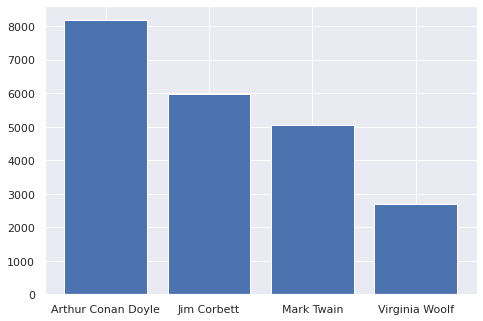

In [177]:
import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
#import plotly.tools as tls

x = all_books.Author.unique()
y = all_books.Author.value_counts().values
           
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show() 

## Train Test Split

In [207]:
# function to split data
def split_data(all_data, all_labels, split_point):
    train_data, test_data, train_labels, test_labels = train_test_split(all_data, all_labels, test_size=1-split_point)

    return train_data, test_data, train_labels, test_labels

In [208]:
# calling the split function
all_data = all_books["Sentence"]
print(len(all_data))
all_labels = all_books['Author']
print(len(all_labels))
train_data, test_data, train_labels, test_labels = split_data(all_data, all_labels, 0.8)

21892
21892


In [209]:
# length of train and test
print(len(train_data), len(test_data), len(train_labels), len(test_labels))
print(train_data.shape, test_data.shape, train_labels.shape)

17513 4379 17513 4379
(17513,) (4379,) (17513,)


# Naive Bayes Model

In [211]:
def nb():
    # fit the model using the training data and then predict the targets/labels of test data
    model = make_pipeline(TfidfVectorizer(), MultinomialNB())
    model.fit(train_data, train_labels)
    labels = model.predict(test_data)
    return labels
pred_labels = nb()

In [214]:
labs, counts = np.unique(pred_labels, return_counts=True)

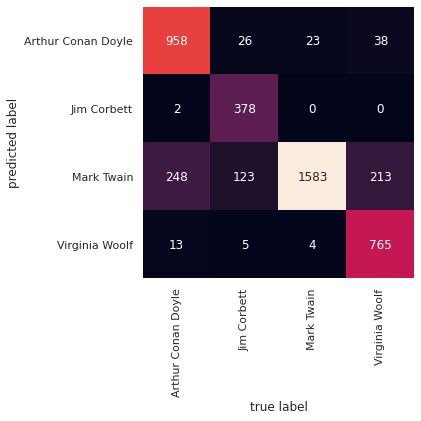

In [216]:
# Generate and display the confusion matrix of your model as a heatmap plot. 
def plot_mat(test_labels, predicted_labels, labs):
    mat = confusion_matrix(test_labels, predicted_labels)
    plt.figure(figsize=(5,5))
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
                xticklabels=labs, yticklabels=labs)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

plot_mat(test_labels, pred_labels, labs)

In [218]:
from sklearn.metrics import f1_score
micro_f1 = f1_score(test_labels, pred_labels, labels=None, pos_label=1, average='micro')
macro_f1 = f1_score(test_labels, pred_labels, labels=None, pos_label=1, average='macro')

print(micro_f1)
print(macro_f1)

0.8412879652888787
0.840326816556797


# MLPClassifier

In [217]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier

In [224]:
# function to hyper tune parameters for MLP model
def MLP(architecture):
  start_time = datetime.now()
  model2 = make_pipeline(TfidfVectorizer(), 
  MLPClassifier(hidden_layer_sizes=architecture, 
                                      random_state=1, 
                                      learning_rate="adaptive",
                                      verbose = True))

  model2.fit(train_data, train_labels)
  model2.predict_proba(test_data)
  pred_labels2 = model2.predict(test_data)
  pred_labels2
  model2.score(test_data, test_labels)
  mat2 = confusion_matrix(test_labels, pred_labels2)
  plt.figure(figsize=(5,5))
  sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False, 
                  xticklabels=["Arthur Conan Doyle", "Jim Corbett", "Mark Twain", "Virginia Woolf"], 
                  yticklabels=["Arthur Conan Doyle", "Jim Corbett", "Mark Twain", "Virginia Woolf"])
  plt.xlabel('true label')
  plt.ylabel('predicted label');
  micro2 = f1_score(test_labels, pred_labels2, average='micro')
  macro2 = f1_score(test_labels, pred_labels2, average='macro')
  print("_______________________________________________")
  print("microaveraged F1 scores for model 2 : ",micro2)
  print("macroaveraged F1 scores for model 2 : ",macro2)
  print("_______________________________________________")
  end_time = datetime.now()
  print('Duration: {}'.format(end_time - start_time))

Iteration 1, loss = 1.04349736
Iteration 2, loss = 0.21332905
Iteration 3, loss = 0.06394809
Iteration 4, loss = 0.03048594
Iteration 5, loss = 0.01604410
Iteration 6, loss = 0.01024318
Iteration 7, loss = 0.00604174
Iteration 8, loss = 0.00399296
Iteration 9, loss = 0.00323287
Iteration 10, loss = 0.00245583
Iteration 11, loss = 0.00249849
Iteration 12, loss = 0.00217275
Iteration 13, loss = 0.00246106
Iteration 14, loss = 0.00150415
Iteration 15, loss = 0.00132713
Iteration 16, loss = 0.00116234
Iteration 17, loss = 0.00128234
Iteration 18, loss = 0.00111196
Iteration 19, loss = 0.00128541
Iteration 20, loss = 0.00144505
Iteration 21, loss = 0.00127459
Iteration 22, loss = 0.00088569
Iteration 23, loss = 0.00118495
Iteration 24, loss = 0.00100437
Iteration 25, loss = 0.00080008
Iteration 26, loss = 0.00094053
Iteration 27, loss = 0.00113825
Iteration 28, loss = 0.00075140
Iteration 29, loss = 0.00110690
Iteration 30, loss = 0.00097541
Iteration 31, loss = 0.00080225
Iteration 32, los

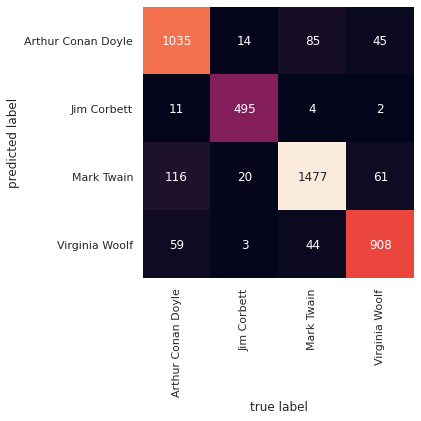

In [225]:
# Model 2 with 4 hidden layers, each with 50 hidden units and learning_rate = "adaptive"
MLP(architecture=(50,50,50,50))

Iteration 1, loss = 1.02591447
Iteration 2, loss = 0.21056622
Iteration 3, loss = 0.06752775
Iteration 4, loss = 0.03284487
Iteration 5, loss = 0.01888638
Iteration 6, loss = 0.01118640
Iteration 7, loss = 0.00795192
Iteration 8, loss = 0.00784535
Iteration 9, loss = 0.00717314
Iteration 10, loss = 0.00494897
Iteration 11, loss = 0.00412098
Iteration 12, loss = 0.00324545
Iteration 13, loss = 0.00241181
Iteration 14, loss = 0.00215455
Iteration 15, loss = 0.00173253
Iteration 16, loss = 0.00161123
Iteration 17, loss = 0.00217338
Iteration 18, loss = 0.00621369
Iteration 19, loss = 0.01724019
Iteration 20, loss = 0.01489227
Iteration 21, loss = 0.00994036
Iteration 22, loss = 0.00587190
Iteration 23, loss = 0.00360501
Iteration 24, loss = 0.00163535
Iteration 25, loss = 0.00105314
Iteration 26, loss = 0.00147552
Iteration 27, loss = 0.00113303
Iteration 28, loss = 0.00113161
Iteration 29, loss = 0.00107704
Iteration 30, loss = 0.00101896
Iteration 31, loss = 0.00097459
Iteration 32, los

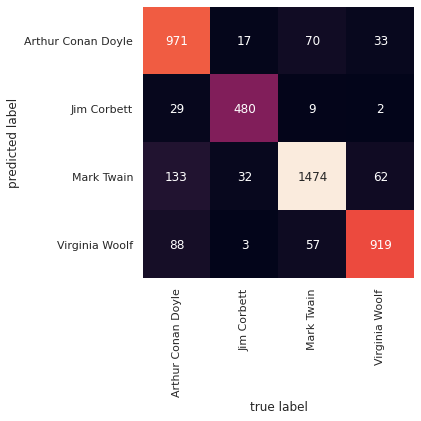

In [227]:
MLP(architecture=(50,50,50,50,50,50,50,50,50,50))